# CNN 畳み込みニューラルネットワーク
前回まで学習した全結合ニューラルネットワークは、入力データを一次元で受け取ります。しかし、一次元以上のデータを一次元に圧縮することで本来の情報が失われてしまう可能性があります。そうなると、作成したモデルで思った通りの結果が出ない可能性があります。今回は、二次元のデータを扱うニューラルネットワークについて学習しましょう。画像分類を得意とする手法として畳み込みニューラルネットワーク(Convolutional Neural Network 通称CNN)があります。CNNについて演習を通して理解を深めていきましょう。

## 画像データ
ここでは、画像を機械にどのようにして読み込ませるのかを説明します。機械に画像を読み込ませる際に、画像をある色のピクセル数が縦横に敷き詰められた二次元のデータに変換します。画像は一色だけではありませんので、さきほど述べた二次元のデータが基本色の枚数だけ並びます。機械はそのデータを「テンソル」というデータの形として受け取りそれを学習します。画像を使ってもう少し具体的に説明したいと思います。

<img src="https://miro.medium.com/max/1050/1*icINeO4H7UKe3NlU1fXqlA.jpeg" width='60%' height='60%'>

図1 カラー画像の構造について\
https://miro.medium.com/max/1050/1*icINeO4H7UKe3NlU1fXqlA.jpeg より引用

上の図では、猫の画像を青、緑、赤の3つのレイヤーに分けて表示しています。そして、それぞれの色レイヤーではどれくらい色が濃いのか薄いのかを数値(ピクセル値)で表しています。ピクセル値が大きいほど、色としては濃くなります。

## 機械は画像をどのように分類する?
人工知能は人間が物を分類する時と同様に、画像を何らかのルールや特徴に基づいてどのグループに属するのかを分類しています。例えば、犬と猫を見分けるモデルを作るとなると、犬や猫の画像にはどんな特徴・パターンがあるのかを見つけて学習をしたのち、犬か猫の画像を与えられた時にどちらであるか正しく分類することを目指します。では次に人工知能はどのようにして与えられた画像のパターンや特徴を学習するのかについて説明したいと思います。

## 畳み込みニューラルネットワーク
画像を扱うタスクにおいて、畳み込みニューラルネットワーク(通称CNN)は最もよく使われているアーキテクチャーです。CNNは分類したい画像の特徴(物体を特定するような大切な情報)を自動で抽出・学習を行うタスクに非常に優れており、
1. 医療画像(癌、COVID-19の検出)
2. 工場での不良品の探知
3. 自動運転における、標識等の認識

等のタスクに用いられています。\
では、CNNでなぜ画像の特徴を抽出できるのでしょうか?

<img src ="https://www.researchgate.net/publication/344421919/figure/fig4/AS:955482537721860@1604816197970/nput-images-and-their-Grad-CAM-Grad-CAM-and-human-understandable-prediction-with.png" width=500>\
図2 COVID-19の検出　\
https://www.researchgate.net/figure/nput-images-and-their-Grad-CAM-Grad-CAM-and-human-understandable-prediction-with_fig4_344421919 より引用

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIzy0_qB7zHHHhy4klNRW-z3DygjiZRCMBLVYQP77mqzX5Wd-mBOS_jgtqNQgaQfHrQys&usqp=CAU" width=500>\
図3 異常検知\
https://www.mvtec.com/company/research/datasets/mvtec-ad より引用

<img src="https://blog.jetbrains.com/wp-content/uploads/2022/01/dog.jpg" width=500>\
図4 物体検知\
https://blog.jetbrains.com/kotlin/2022/01/object-detection-with-kotlindl-and-ktor/ より引用

畳み込みニューラルネットワークでは、文字通り「畳み込み」と呼ばれる演算を行います。畳み込み演算を簡単に説明すると、あるフィルターを用意し、そのフィルターに画像を通すことで画像の特定の特徴が活性化されます。CNNでは、この畳み込み処理を行う層が何層にも連なっているため、一連の層に画像を通すことで、分類を行うにあたっての特徴を抽出することができます。では具体的に畳み込み演算の手順について見ていきましょう。

<img src="https://cdn-media-1.freecodecamp.org/images/d0ufdQE7LHA43cdSrVefw2I9DFceYMixqoZJ" width=400>\
図5 畳み込み演算のイメージ図

<img src="https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t" width = 400>\
図6 畳み込み演算のイメージ図

https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/ より引用

写真右の3x3の合計9個のマス目を持つ緑色の正方形があります。これを上ではフィルターと呼んでいました。以降これをカーネルフィルターと呼びます。画像(5x5の合計25個のマス目を持つ水色の正方形)にカーネルフィルターを当てて、それぞれのマス目において、画像の値とカーネルフィルターの値の積を取ります。図において、1x1や1x0と表記されていますが、画像の各マス目の値とカーネルフィルターの各マス目の値との積を取っています。(この演算を要素積を取るという言葉で表現することもあります)そして、各要素の積の和を取り、その値を出力として出します。赤の正方形の各マスの合計は畳み込み演算を行った回数の合計を表します。一門具体的な例を示します。


\begin{pmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
\end{pmatrix}

という画像データに対して

\begin{pmatrix}
1 & 2  \\
2 & 1  \\
\end{pmatrix}

というフィルターを作用させます。
始めに、画像データの

\begin{pmatrix}
1 & 2  \\
5 & 6  \\
\end{pmatrix}
とカーネルの各要素の積を取ります。すると、

\begin{pmatrix}
1 & 4  \\
10 & 6  \\
\end{pmatrix}
という結果になります。この行列の要素和を取ると、
1 + 4 + 10 + 6 = 21という結果になります。この計算をフィルターが端にくるまで続けます。(カーネルを一個ずつスライドするとき、strideは1と表現します。)横方向にスライドさせていくと、次は
\begin{pmatrix}
2 & 3  \\
6 & 7  \\
\end{pmatrix}
とカーネルの要素積をとります。畳み込み演算の仕組みが分かったところで演習1に取り組みましょう。

### 畳み込み演算
**[演習1]** 畳み込み演算を実装してみましょう。\
畳み込み演算を理解するためにネコの画像を用いて、任意をフィルターを用いて畳み込み演算を行ってみましょう。

<img src='data/cat.jpg' width=500>\
図7 ネコの画像\
http://freebies-db.com/free-photo-gak-nekocafenonekocyan-pakutaso.html より引用

上の画像を読み込み適切なデータへ変換します。

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

#画像を読み込む
img_ = tf.keras.preprocessing.image.load_img('data/cat.jpg',target_size=(300,300))
#読み込んだ画像をnumpy arrayに変換する
img = tf.keras.preprocessing.image.img_to_array(img_)
#pixel値を0～1の値に変更する
img = img/255
print("img size = ",img.shape)

img size =  (300, 300, 3)


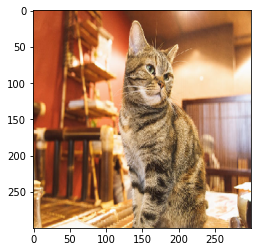

In [4]:
plt.imshow(img)
plt.show()

便宜上、(300,300,3)の画像データにサイズを変更しています。では、適当な(3x3)のカーネルフィルターを用意してみましょう。今回は0～１の要素を持つカーネルフィルターを`np.random.rand()`関数で自動生成します。

In [5]:
kernel = np.random.rand(5, 5, 1)
print("カーネルサイズ = ",kernel.shape)

カーネルサイズ =  (5, 5, 1)


3x3のカーネルが用意できたので、畳み込み演算を行ってみましょう。`numpy`での実装例を下に示します。

一回目の畳み込み処理後 (296, 296, 3)


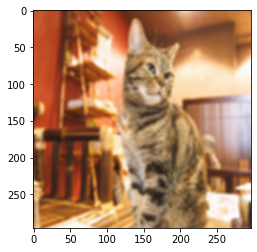

In [6]:
#正の値のみを抽出するRelu関数と呼ばれる活性化関数です。
#ここでは詳しいことは気にせず先に進みましょう。
def relu(x):
    return np.maximum(0, x) #0とxを比較して大きい方の数値を返す

def conv2d(img,kernel):
  #出力のサイズ
  h_out = img.shape[0] - kernel.shape[0] + 1
  w_out = img.shape[1] - kernel.shape[0] + 1
  #カーネルサイズ
  h_f = kernel.shape[0]
  w_f = kernel.shape[1]
  #出力のサイズを持つ空配列を定義
  img_out = np.empty(shape=(h_out,w_out,3))

  #畳み込み処理(上で説明した処理を実行しています)
  for c in range(img.shape[2]):
    for h in range(img.shape[0] - h_f + 1):
      for w in range(img.shape[1] -w_f + 1):
        img_small = img[h:h+h_f,w:w+w_f,c]
        img_conv = img_small*kernel
        img_out[h,w,c] = np.sum(img_conv)

  return img_out

out = conv2d(img,kernel)
out = relu(out)
#plt.imshow()を使うために(0,1)のスケールに合わせる
out = out/np.max(out)
print("一回目の畳み込み処理後", out.shape)
#plt.imshow()で可視化
plt.imshow(out)

一回目の畳み込み処理後の画像を可視化しました。元の画像と比較して画像が全体的にぼやけている様子がわかります。畳み込みニューラルネットワークでは、カーネルフィルターを学習します。重要な特徴が抽出できるように繰り返し学習を行います。ではもう一度畳み込みを行うとどうなるか見てみましょう。

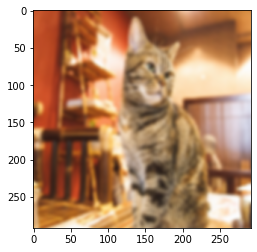

In [7]:
out = conv2d(out,kernel)
out = relu(out)
out = out/np.max(out)
plt.imshow(out)

更にぼやけたことが確認できました。では、カーネルの値を変えて色々試してみましょう。

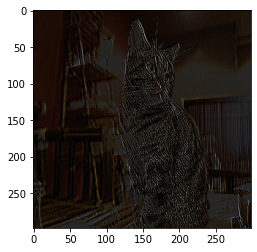

In [8]:
##########演習##########
#kernelの値を好きなように変更してみてください

#適当なkernelの値を提供します
#kernelの数値の部分を適当に変えて実験してみてください
kernel = np.array([[1.,-3.,2.],[2.,-1.5,1.],[0.,1.,-2.]])
#これ以降の変更は不要です。
out = conv2d(img,kernel)
out = relu(out)
out = out/np.max(out)
plt.imshow(out)

畳み込み演算についての理解は深まりましたか? 畳み込みニューラルネットワークではこの畳み込み演算を行う層が多数存在します。その層が深いゆえにディープラーニングと呼ばれているのです。

### プーリング処理
ここで新しい言葉が出てきました。畳み込みニューラルネットワークにおいて、特殊なフィルターを画像に適応させ、学習したい特徴を抽出する処理が畳み込みでした。演習1では300x300の画像に3x3もしくは5x5のフィルターを作用させていました。そこで注目してほしいポイントがあります。一回の畳み込みで画像のサイズは減りましたが、少ししか減っていないことに気づきませんでしたか? これだと画像の学習にかかるコストが大きいです。そのため、畳み込みニューラルネットワークでは画像の情報をあえて減らす処理を行います。それがプーリング(Pooling)です。プーリングによって

1. 画像中のノイズやズレに対処できる
2. 計算量を大幅に減らせる

が期待できます。1のことを移動不変性という言葉で表現することもあります。

では、プーリングの手法について学習していきましょう。
まずは下の画像を見てください

<img src="https://tkengo.github.io/assets/img/understanding-convolutional-neural-networks-for-nlp/max-pooling.png" width=400>\
図8 プーリングのイメージ図\
https://tkengo.github.io/blog/2016/03/11/understanding-convolutional-neural-networks-for-nlp/ より引用

4x4の画像があります。その画像を2x2の4つの小グループに分けています。そして各グループにおいて要素の値が最も大きい値を代表値として採用します。結果、4x4の画像を2x2の画像に圧縮できました。畳み込み演算と同じで、まずフィルターのサイズやスライド幅(今回は2x2のフィルター、スライド幅2)を決める必要があります。プーリングは大体の場合2x2のフィルターを採用します。また、ここでは要素の最大値を採用するプーリングを用いていますが、要素の平均値を採用するプーリングを使用することもあります。前者を最大プーリング、後者を平均プーリングと呼びます。プーリングについての理解が深まったところで、演習に取り組んでみましょう。

**[演習2]** プーリング

1.0
一回目のプーリング処理後 (297, 297, 3)


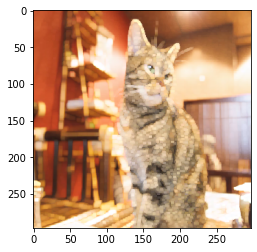

In [21]:
##########演習##########
#Max Pooling 実装
#全ての処理を完璧に理解する必要はありませんが、どんな処理が行われているか目で追ってみましょう

def max_pool(img,pool_size):
  #出力のサイズ
  stride = 1
  pool_h = pool_size
  pool_w = pool_size
  h_out = int(1 + (img.shape[0] - pool_h) / stride)
  w_out = int(1 + (img.shape[1] - pool_w) / stride)

  #出力のサイズを持つ空配列を定義
  img_out = np.empty(shape=(h_out,w_out,3))

  #最大プーリング(上で説明した処理を実行しています)
  for h in range(0,img.shape[0]-pool_h + 1,stride):
    for w in range(0,img.shape[1]-pool_w + 1,stride):
      for c in range(img.shape[2]):
        img_small = img[h:h+pool_h-1,w:w+pool_w,c]
        img_out[h,w,c] = np.max(img_small)
  
  return img_out

#ここを変えてみましょう
kernel_size = 4
#######################
out = max_pool(img,kernel_size)
#plt.imshow()を使うために(0,1)のスケールに合わせる
out = out/np.max(out)
print("一回目のプーリング処理後", out.shape)
#plt.imshow()で可視化
plt.imshow(out)

### CNNの構造を理解しよう
ここまで、畳み込みとプーリングについて学習してきました。では最後にCNNの構造について学習してみましょう。

<img src="https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1593967518672-RPGLD1X41M4OXWENZ0BN/CNN+Structure.jpg" width=600> \
図9 CNNの構造図\
https://www.ml-science.com/convolutional-neural-networks より引用

CNNの学習の流れを説明したいと思います。
学習の流れは以下の1～6のステップで進行します。

1. 画像をフィルターに作用させ、重要な特徴量を抽出する
2. プーリング層で画像サイズを減らす
3. 1,2を数回繰り返す
4. 畳み込み最終層の出力を全結合層に渡す(ここで画像は2次元から1次元に変換されます)
5. 活性化関数を用いて最終的な出力を得る。
6. 損失関数を用いて、畳み込み層のフィルター、全結合層の重みを適切な値に更新をしていく

損失関数については全結合ニューラルネットワークの部分で説明しましたが、もう一度説明すると、正解と予測値の差を表します。この差を小さくするように膨大なパラメータの値を学習していきます。CNNの構造についての説明は以上となります。では最後にCNNを使った分類問題に取り組んでみましょう。

## CNNを用いた分類問題
畳み込みニューラルネットワークの基本的な概念についてここまで学習してきました。最後の演習では、畳み込みニューラルネットワークを構築し、画像データの分類問題に取り組んでみましょう。

[今回用いるデータセット]\
<a href = "https://ja.wikipedia.org/wiki/MNIST%E3%83%87%E3%83%BC%E3%82%BF%E3%83%99%E3%83%BC%E3%82%B9">MNIST</a>と呼ばれる手書き数字が描かれている画像データを使用します。機械学習や深層学習においてモデルの学習・評価に幅広く用いられております。

In [ ]:
#ライブラリーのimport
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


データセットをダウンロードします。

In [ ]:
#データセットのダウンロード
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


データをtrain,testの二つに分けています。データを分割する理由は、trainでモデルの訓練を行い、testで訓練したモデルの能力を測るためです。全てのデータを学習に用いると、モデルの未知データへの対応力を測ることができません。なので、データを目的に応じて分割する作業が必要になるのです。

In [ ]:
#画像のサイズを確認する
print("学習画像:",train_images.shape)
print("検証画像:",test_images.shape)

学習画像: (60000, 28, 28)
検証画像: (10000, 28, 28)


画像の前処理として、0から1の値を取るようにスケーリングを行います。

In [ ]:
#前処理
#ピクセル値を(0,1)の値に限定する
train_images = train_images / 255.0
test_images = test_images / 255.0

どんな画像なのか、`plt.imshow()`関数で確認することができます。

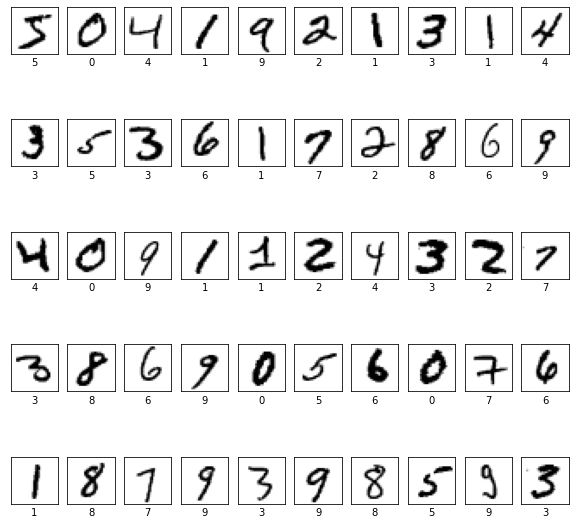

In [ ]:
#いくつか画像を表示させてみましょう
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

確かに手書き文字が表示されています。では、CNNのモデルを作っていきましょう。

In [ ]:
class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = layers.Conv2D(16,(3,3),activation='relu')
        self.pool = layers.MaxPool2D()
        self.conv2 = layers.Conv2D(32,(3,3),activation='relu')
        self.conv3 = layers.Conv2D(64,(3,3),activation='relu')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(64,activation='relu')
        self.fc2 = layers.Dense(10,activation='softmax')
    
    def call(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [ ]:
model = CNN()
model.summary()



```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                36928     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
=================================================================
Total params: 60,874
Trainable params: 60,874
Non-trainable params: 0
_________________________________________________________________
```



->Convolution \
->Pooling  \
->Convolution \
->Pooling \
->Convolution \
->2次元から1次元に変換 \
->全結合層 \
->全結合層\
->出力\
のようなシンプルなネットワークを構成しました。次に損失関数、最適化手法の設定を行います。

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

`loss`では`sparse_categorical_crossentropy`(交差エントロピー)を損失関数の引数としています。
`optimizer`とは `loss`で指定されている損失関数をどのように最適化するかを表すモードです。\
`Adam`を選択していますが、引数の値については今は気にしなくて大丈夫です。

`epochs`は今回は10に設定しています。

In [ ]:
EPOCH = 10
history = model.fit(train_images,train_labels,epochs=EPOCH)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1554 - accuracy: 0.9526
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 33s 17m

訓練が無事終わったらテストデータでのモデルの検証を行いましょう。

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0428 - accuracy: 0.9906 - 2s/epoch - 7ms/step

Test accuracy: 0.9905999898910522


`Test accuracy: 0.9905999898910522`は、このモデルは見たことないデータを99%の正答率で分類することができたということです。モデルの分類性能はテストデータの正答率を用いて評価します。

モデルの訓練において、訓練データを更に2つに分け、片方を訓練用、もう片方を検証用データとします。訓練用データと検証用データにおける損失の値をEPOCH数とともにプロットしてみましょう。

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCH)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

train, validationともにEPOCH数が増えるとともに減衰しています。それに加え、trainとvalidationの値に極端な差が出るようなこともありません。よって、学習は正常に行われていることを示します。

**[演習3]** Fashion-MNISTを用いた学習\
ここまで、`MNIST`での画像分類タスクについて取り組んできました。上のタスクを別のデータセットで取り組んでみるとどうでしょうか? 

`MNIST`データセットの他には`Fashion-MNIST`と呼ばれる衣服・靴等の白黒画像が保存されているデータセットがあります。データをロードするまでをヒントとして提供します。モデルの層を増やしてみたり、学習の繰り返し回数を変更してみるなどの改良を行ってみてください。

In [ ]:
#データセットのダウンロード
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#MNISTは数字だったので、出力をそのまま使ってよかったのですが、Fashion-MNISTでは何番目のクラスが何を表しているか(ラベルと呼びます)の情報が必要となります。
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#総合演習
#続きは例を参考にしてみてください

#画像のサイズを確認する
print("学習画像:",train_images.shape)
print("検証画像:",test_images.shape)

In [ ]:
#前処理
#ピクセル値を(0,1)の値に限定する
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#いくつか画像を表示させてみましょう
#labelはMNISTの時は数字で良かったのですが、Fashion-MNISTの時は「T-shirts」等の名前を使います。
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#modelの構成
#MNISTの時と同じモデルだと上手くいくという保証は必ずしもないので、層を加えたり、層のチャンネル数を変更したりしましょう。
#Conv2D 畳み込み層
#Dnse 全結合層

class CNN_update(tf.keras.Model):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = layers.Conv2D(16,(3,3),activation='relu')
        self.pool = layers.MaxPool2D()
        self.conv2 = layers.Conv2D(32,(3,3),activation='relu')
        self.conv3 = layers.Conv2D(64,(3,3),activation='relu')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(64,activation='relu')
        self.fc2 = layers.Dense(10,activation='softmax')
    
    def call(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## まとめ
今回はディープラーニングのモデルの基本パーツとなる畳み込みニューラルネットワークについて学習しました。入力を一次元のベクトルとして扱う全結合ニューラルネットワークと異なり、畳み込みニューラルネットワークでは畳み込み演算、プーリング処理といった二次元データを扱う上で必要な演算を扱いました。画像認識分野で用いられている画像認識モデルは今回学習したCNNが基盤となっています。次回は画像を扱うタスクの応用例として、大規模なネットワークを用いて任意の画像を分類する演習に取り組んでみたいと思います。

## 参考文献
[1] https://www.tensorflow.org/tutorials/keras/classification?hl=ja \
[2] https://blog.ef-4.co.jp/cnn%E7%95%B3%E3%81%BF%E8%BE%BC%E3%81%BF%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E3%81%AE%E4%BB%95%E7%B5%84%E3%81%BF/